In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Feature Engineering

In [2]:
churn_data_raw = pd.read_csv('./data/churn.csv')

In [3]:
churn_data = churn_data_raw.copy()

In [4]:
X = churn_data.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
y = churn_data['Exited']
X = pd.get_dummies(X)

### Model Building

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

i = 1
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X,y):
    print(f'{i} of kfold {skf.n_splits}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rfc = RandomForestClassifier(random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    prob = rfc.predict_proba(X_test)[:,1]
    score = accuracy_score(y_test,y_pred)
    i+=1
    print(score, 'accuracy')

1 of kfold 5
0.849 accuracy
2 of kfold 5
0.869 accuracy
3 of kfold 5
0.866 accuracy
4 of kfold 5
0.868 accuracy
5 of kfold 5
0.847 accuracy


### Model Analysis

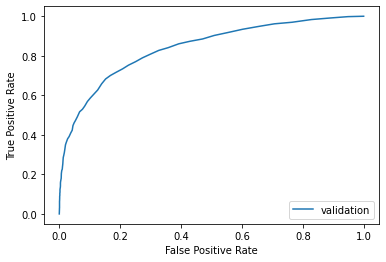

AUC score is 0.8398605364612268
Accuracy of the model is 0.8306


In [14]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, prob, pos_label=1)
auc = metrics.roc_auc_score(y_test, prob)

plt.plot(fpr,tpr, label="validation")
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()
print(f"AUC score is {auc}")
print(f"Accuracy of the model is {score}")

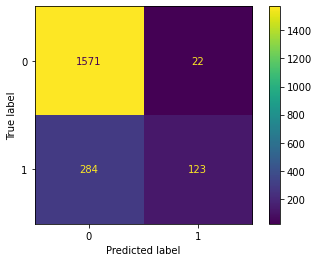

In [25]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()  

In [26]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
